## Imports

In [5]:
# import libraries useful for analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# import libraries useful for model building
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [7]:
# import libraries for model export
import pickle
import json

## Dataset to Dataframe

In [8]:
# read dataset into pandas dataframe
df = pd.read_csv('dataset.csv')

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df.head()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
0,24,62,30,32,32.5,14.4,5.4,12.4,43.7,1.2,...,3.7,1.6,0.8,0.6,2.0,31.9,20.0,1.0,-1.1,80.0
1,23,66,42,24,24.5,9.5,3.5,8.5,41.4,1.3,...,3.4,1.3,0.8,0.2,1.8,19.3,3.0,0.0,1.7,76.0
2,26,55,37,18,15.8,6.3,2.2,4.8,46.8,0.9,...,0.7,0.8,0.4,0.4,1.4,11.1,0.0,0.0,-1.5,71.0
3,21,11,3,8,10.2,2.9,1.1,2.5,42.9,0.5,...,0.4,0.2,0.4,0.0,1.5,5.5,0.0,0.0,4.5,68.0
4,23,33,9,24,11.2,3.0,1.1,2.8,38.0,0.6,...,0.5,0.2,0.2,0.1,1.5,6.3,0.0,0.0,-1.7,71.0


In [11]:
# working copy of the original dataframe
df_work = df.copy()

In [12]:
# inspect dataframe shape
df_work.shape

(2784, 28)

In [13]:
# investigate columns
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2784 entries, 0 to 2783
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AGE       2784 non-null   int64  
 1   GP        2784 non-null   int64  
 2   W         2784 non-null   int64  
 3   L         2784 non-null   int64  
 4   MIN       2784 non-null   float64
 5   PTS       2784 non-null   float64
 6   FGM       2784 non-null   float64
 7   FGA       2784 non-null   float64
 8   FG%       2784 non-null   float64
 9   3PM       2784 non-null   float64
 10  3PA       2784 non-null   float64
 11  3P%       2784 non-null   float64
 12  FTM       2784 non-null   float64
 13  FTA       2784 non-null   float64
 14  FT%       2784 non-null   float64
 15  OREB      2784 non-null   float64
 16  DREB      2784 non-null   float64
 17  REB       2784 non-null   float64
 18  AST       2784 non-null   float64
 19  TOV       2784 non-null   float64
 20  STL       2784 non-null   floa

In [14]:
df_work.describe()

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,rankings
count,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,...,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000
mean,26.285201,54.527299,27.603807,26.923491,21.651042,9.614224,3.560668,7.790841,45.378089,0.923563,...,2.081214,1.232902,0.691810,0.447629,1.835632,19.707328,4.948635,0.255029,-0.090769,75.831178
std,4.157151,22.284557,14.949790,13.363928,8.748291,6.124651,2.194573,4.627179,8.800450,0.832983,...,1.852970,0.819074,0.416802,0.435739,0.719775,10.871308,10.010409,1.824193,3.037176,5.806827
min,19.000000,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000,62.000000
25%,23.000000,40.000000,16.000000,17.000000,15.100000,5.100000,1.900000,4.300000,41.000000,0.200000,...,0.800000,0.700000,0.400000,0.200000,1.400000,11.800000,0.000000,0.000000,-1.900000,72.000000
50%,26.000000,61.000000,27.000000,27.000000,21.800000,8.200000,3.100000,6.700000,44.600000,0.800000,...,1.500000,1.000000,0.600000,0.300000,1.900000,17.900000,1.000000,0.000000,-0.200000,75.000000
75%,29.000000,73.000000,39.000000,36.000000,29.100000,12.900000,4.900000,10.600000,49.200000,1.400000,...,2.700000,1.600000,0.900000,0.600000,2.300000,26.025000,5.000000,0.000000,1.500000,78.000000
max,41.000000,83.000000,73.000000,68.000000,38.700000,36.100000,11.200000,24.500000,100.000000,5.300000,...,11.700000,5.700000,2.400000,3.700000,5.000000,60.600000,69.000000,42.000000,14.000000,98.000000


## Feature selection

In [15]:
X=df_work.drop(['FP','rankings'], axis=1)
y=df_work['rankings'] # dependent variable

FP (number of fantasy points a player accumulates) is a derived from several statistical categories. The formula for FP calculation is FP = 1xPTS + 1,2xREB + 1,5xSTL + 3xBLK - 1xTOV. So, it is highly correlated with the most of independent variables.

In [16]:
# make train-test split to avoid overfititng
train_X,test_X,train_y,test_y=train_test_split(X,y,train_size=0.8,random_state=10)

In [17]:
# check shape
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((2227, 26), (557, 26), (2227,), (557,))

In [18]:
# join train_X and train_y for easier correlation calculation
train = pd.concat([train_X, train_y], axis=1)

In [19]:
train

,AGE,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,DD2,TD3,+/-,rankings
2460,24,36,14,22,13.6,6.3,2.5,5.0,50.8,0.4,...,3.1,0.8,0.8,0.4,0.5,1.6,0.0,0.0,-1.6,74.0
1,23,66,42,24,24.5,9.5,3.5,8.5,41.4,1.3,...,2.4,3.4,1.3,0.8,0.2,1.8,3.0,0.0,1.7,76.0
1696,29,79,45,34,22.8,7.3,3.2,5.4,58.5,0.1,...,6.4,1.7,1.2,0.7,1.1,2.7,8.0,0.0,1.7,76.0
2027,28,66,31,35,21.4,5.7,2.1,5.4,39.3,0.5,...,1.8,3.6,1.4,0.8,0.1,1.3,1.0,0.0,-2.4,73.0
814,28,42,15,27,10.8,4.0,1.4,3.0,45.2,0.9,...,1.5,0.5,0.4,0.1,0.1,0.8,0.0,0.0,1.7,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,25,73,53,20,23.9,9.9,3.7,8.6,43.1,1.8,...,2.5,0.8,0.6,0.7,0.3,1.6,1.0,0.0,3.3,75.0
1180,20,74,51,23,20.0,5.9,2.2,4.7,47.1,1.0,...,2.5,0.7,0.6,0.7,0.2,1.8,0.0,0.0,4.0,76.0
1344,20,17,9,8,11.7,5.1,2.1,4.5,47.4,0.0,...,4.3,0.2,0.4,0.2,0.4,1.0,3.0,0.0,-3.1,70.0
527,22,57,14,43,14.5,7.3,2.9,6.9,41.9,0.6,...,1.9,0.7,0.6,0.2,0.2,0.7,0.0,0.0,-2.6,72.0


<AxesSubplot:>

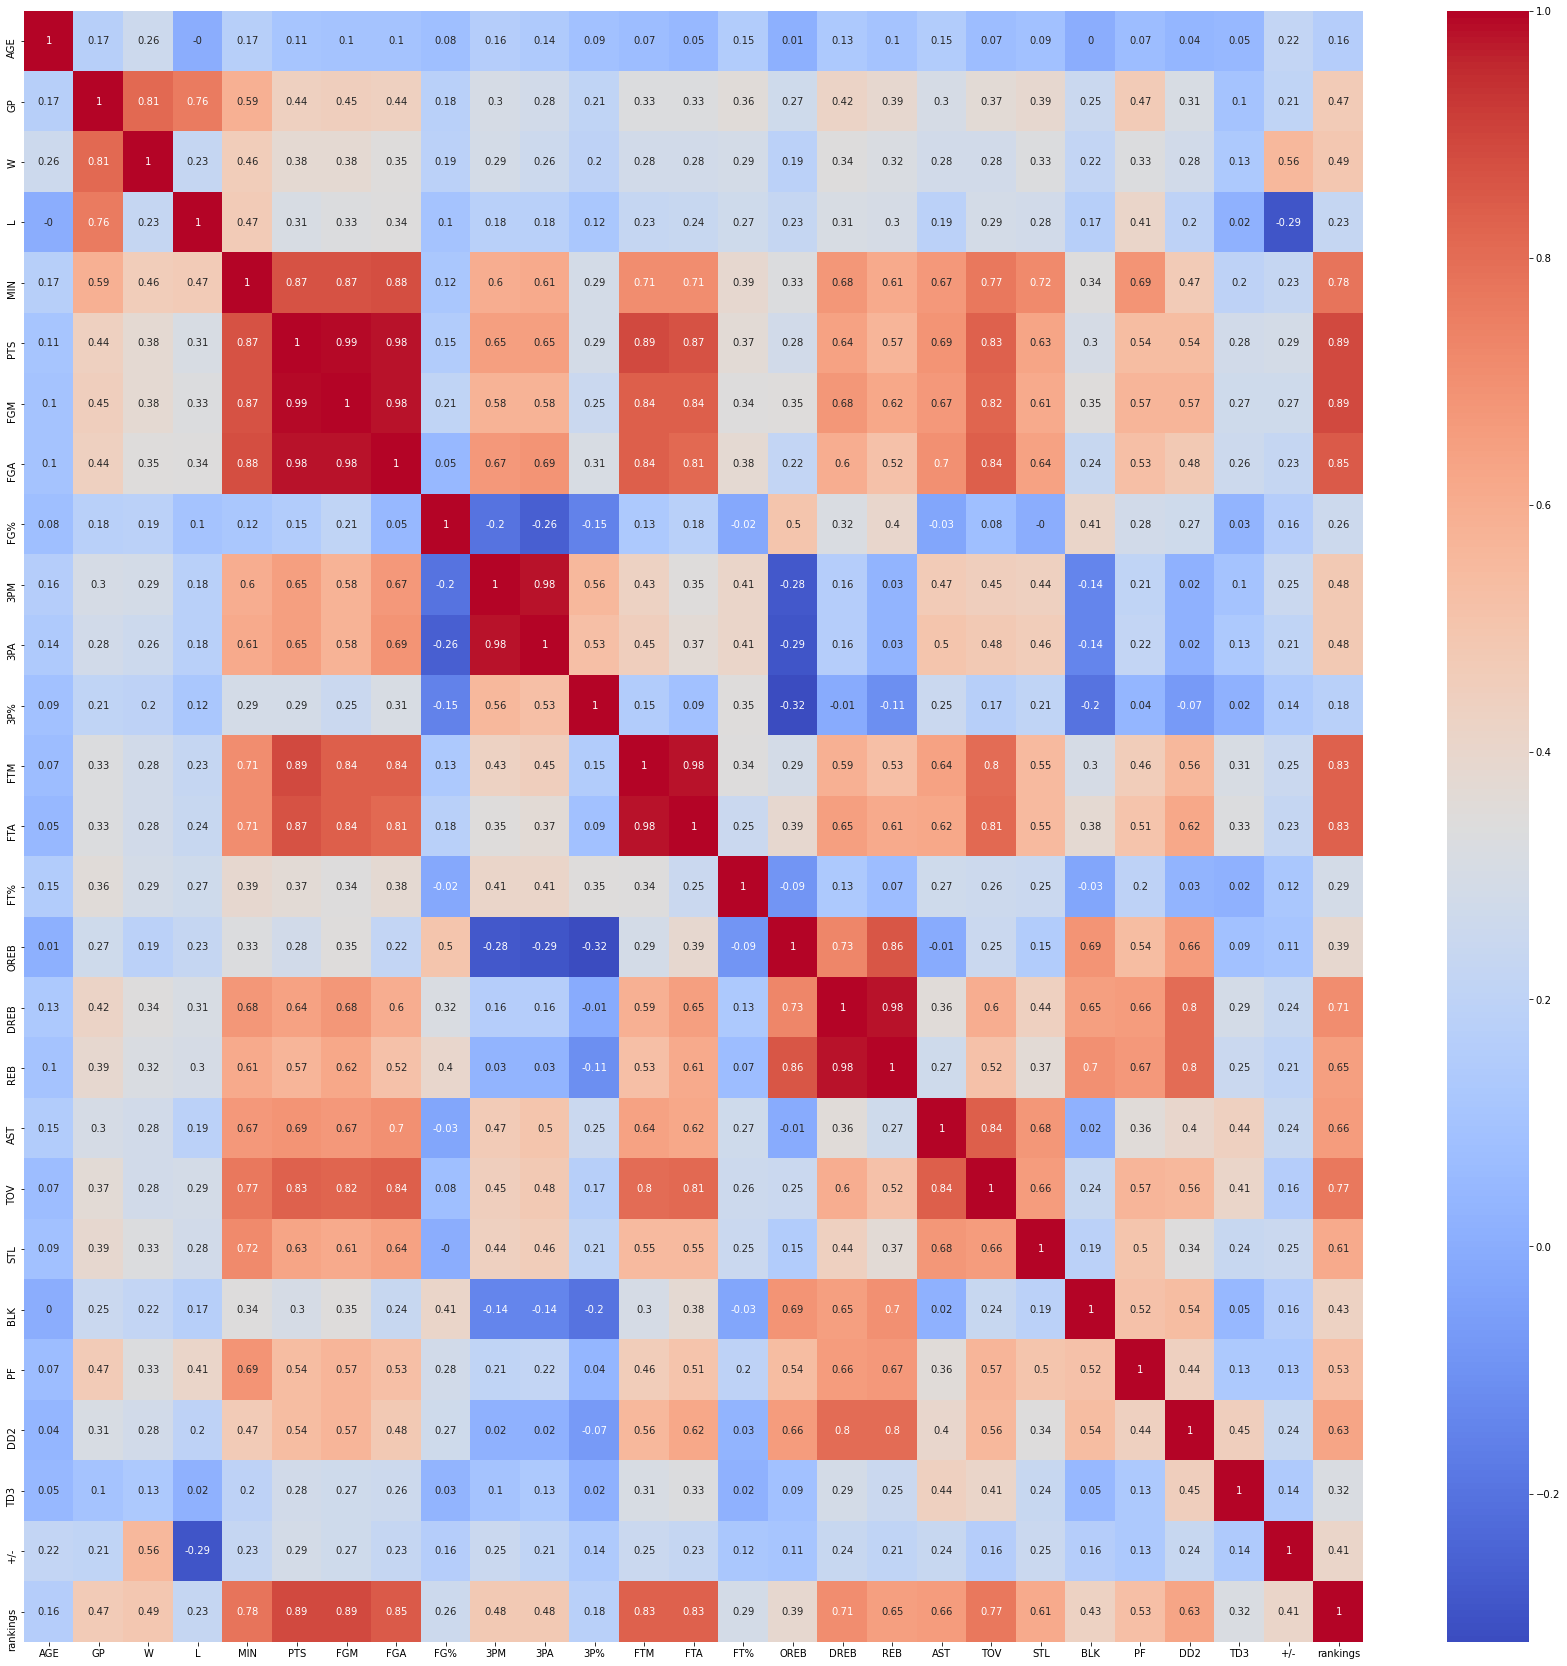

In [20]:
# correlation matrix
plt.figure(figsize=(30,30))
sns.heatmap(round(train.corr(), 2), annot=True, cmap='coolwarm')

Picture above is showing Pearson (standard) correlation coefficients.

Observations:
- Independent features that have less than 0,25 correlation with target variable (rankings) are: AGE, L and 3P%. We will drop these features.
- Independent features that have highest correlation (>= 0.75) with target variable are: PTS, FGM, FGA, FTM, FTA, MIN, TOV. Those are our strongest features but some of them are highly correlated among themselves, which is not good for the model. We need to investigate further and decide which of those features to drop, which to keep.

In [21]:
# drop poorly correlated features from train and test set
train_X.drop(['AGE', 'L', '3P%'], axis=1, inplace=True)
test_X.drop(['AGE', 'L', '3P%'], axis=1, inplace=True)

/home/mattdmv/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
# determnine the mutual information (this will further help with feature selection)
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(train_X, train_y)
mutual_info

array([0.21674894, 0.2029997 , 0.60570873, 0.77047582, 0.78738474,
       0.66912699, 0.12008594, 0.20726902, 0.24126147, 0.5463665 ,
       0.56801638, 0.13999908, 0.16353386, 0.3970967 , 0.37666794,
       0.32003146, 0.44535096, 0.27448624, 0.15980476, 0.25604562,
       0.35665837, 0.04206989, 0.13326685])

In [23]:
# sort mutual info
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_X.columns
mutual_info.sort_values(ascending=False)

FGM     0.787385
PTS     0.770476
FGA     0.669127
MIN     0.605709
FTA     0.568016
FTM     0.546367
TOV     0.445351
DREB    0.397097
REB     0.376668
DD2     0.356658
AST     0.320031
STL     0.274486
PF      0.256046
3PA     0.241261
GP      0.216749
3PM     0.207269
W       0.203000
OREB    0.163534
BLK     0.159805
FT%     0.139999
+/-     0.133267
FG%     0.120086
TD3     0.042070
dtype: float64

In [24]:
# features to drop FGA, FGM, W, MIN, 3PA, FTM, FTA, OREB, DREB, AST, DD2, TD3
drop_list = ['FGA', 'FGM', 'W', 'MIN', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 'AST', 'DD2', 'TD3']

In [25]:
train_X.drop(drop_list, axis=1, inplace=True)
test_X.drop(drop_list, axis=1, inplace=True)

/home/mattdmv/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
train_X

,GP,PTS,FG%,3PM,FT%,REB,TOV,STL,BLK,PF,+/-
2460,36,6.3,50.8,0.4,72.1,3.1,0.8,0.4,0.5,1.6,-1.6
1,66,9.5,41.4,1.3,85.1,2.4,1.3,0.8,0.2,1.8,1.7
1696,79,7.3,58.5,0.1,57.0,6.4,1.2,0.7,1.1,2.7,1.7
2027,66,5.7,39.3,0.5,68.6,1.8,1.4,0.8,0.1,1.3,-2.4
814,42,4.0,45.2,0.9,78.9,1.5,0.4,0.1,0.1,0.8,1.7
...,...,...,...,...,...,...,...,...,...,...,...
2009,73,9.9,43.1,1.8,79.0,2.5,0.6,0.7,0.3,1.6,3.3
1180,74,5.9,47.1,1.0,62.9,2.5,0.6,0.7,0.2,1.8,4.0
1344,17,5.1,47.4,0.0,71.4,4.3,0.4,0.2,0.4,1.0,-3.1
527,57,7.3,41.9,0.6,65.8,1.9,0.6,0.2,0.2,0.7,-2.6


In [27]:
# We're left with 11 features

In [28]:
# Standardize features
from sklearn.preprocessing import StandardScaler

In [29]:
stand_scaler = StandardScaler()

In [30]:
stand_train_X = stand_scaler.fit_transform(train_X)
stand_test_X = stand_scaler.transform(test_X)

## Model building

In [31]:
# sklearn algorithms: LinearRegression, DecisionTreeRegressor, RandomForestRegressor, XGBRegressor, MLPRegressor

### Linear Regression 

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(stand_train_X, train_y)

LinearRegression()

In [34]:
score_lr = lr.score(stand_test_X, test_y)
score_lr

0.8767941899625238

### Decision Tree Regressor

In [35]:
dtr = DecisionTreeRegressor()

In [36]:
dtr.fit(stand_train_X, train_y)

DecisionTreeRegressor()

In [37]:
score_dtr = dtr.score(stand_test_X, test_y)
score_dtr

0.7544470735825645

In [38]:
dtr.get_depth()

21

In [39]:
dtr.get_n_leaves()

1301

### Random Forest Regressor

In [40]:
rfr = RandomForestRegressor()

In [41]:
rfr.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [42]:
rfr.fit(stand_train_X, train_y)

RandomForestRegressor()

In [43]:
score_rfr = rfr.score(stand_test_X, test_y)
score_rfr

0.8633479820454562

### XGBRegressor

In [44]:
xgbr = XGBRegressor()

In [45]:
xgbr.fit(stand_train_X, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
score_xgbr = xgbr.score(stand_test_X, test_y)
score_xgbr

0.8336907446115042

### Neural Network

In [47]:
nn = MLPRegressor(hidden_layer_sizes=(100,100,50), max_iter=1000, early_stopping=True, validation_fraction=0.15)

In [48]:
nn.fit(stand_train_X, train_y)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 100, 50),
             max_iter=1000, validation_fraction=0.15)

In [49]:
score_nn = nn.score(stand_test_X, test_y)
score_nn

0.8181552183492222

### Grid Search CV
Exhaustive search over specified parameter values for an estimator.

In [50]:
# sklearn algorithms: LinearRegression, DecisionTreeRegressor, RandomForestRegressor, XGBRegressor, MLPRegressor

In [67]:
def GridSearchCV_function(X, y):
    """This function will find the best model using GridSearchCV"""
    
    algorithms = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        },
        'random_forest' : {
            'model' : RandomForestRegressor(),
            'params' : {
                'n_estimators':[100, 200, 300],
                'criterion' : ['mse', 'friedman_mse'],
                'max_depth': [10, 15, 20]
            }
        },
        'xgboost' : {
            'model' : XGBRegressor(),
            'params' : {
                'n_estimators':[100, 500, 900, 1100, 1500],
                'learning_rate':[0.05, 0.1, 0.15, 0.2],
                'booster':['gbtree', 'gblinear'],
                'base_score':[0.25, 0.5, 0.75, 1]
            }
        },
        'multilayer_perceptron' : {
            'model' : MLPRegressor(), 
            'params' : {
                'hidden_layer_sizes' : [(50,50,50),(100,100,50), (100,100,100)], 
                'max_iter' : [1000, 500],
                'early_stopping': [True, False]
            } 
        }
    }
    
    scores = []
    
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algorithm_name, config in algorithms.items():
        gs=GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        
        scores.append({
            'model' : algorithm_name, 
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [52]:
# We'll use entire dataset as argument of GridSearchCV function because we have ShuffleSplit inside, so 
# we have to drop rows the same way we did with train and test data after we did train-test split
drop_list_II = ['FGA', 'FGM', 'W', 'MIN', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 'AST', 'DD2', 'TD3', 'AGE', 'L', '3P%']

In [53]:
#X = X.drop(drop_list_II, axis=1)

In [57]:
%%time

best_models = GridSearchCV_function(X, y)

CPU times: user 1h 26min 49s, sys: 1min 9s, total: 1h 27min 59s
Wall time: 31min 19s


In [61]:
best_models

,model,best_score,best_params
0,linear_regression,0.895459,{}
1,decision_tree,0.752837,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
2,random_forest,0.882811,"{'criterion': 'friedman_mse', 'max_depth': 15,..."
3,xgboost,0.895742,"{'base_score': 0.5, 'booster': 'gbtree', 'lear..."
4,multilayer_perceptron,0.736407,"{'early_stopping': False, 'hidden_layer_sizes'..."


In [63]:
# best hyperparameters for RandomForestRegressor
best_models['best_params'][2]

{'criterion': 'friedman_mse', 'max_depth': 15, 'n_estimators': 200}

In [64]:
# best hyperparameters for XGBRegressor
best_models['best_params'][3]

{'base_score': 0.5,
 'booster': 'gbtree',
 'learning_rate': 0.1,
 'n_estimators': 100}

In [66]:
# best hyperparameters for MLPRegressor
best_models['best_params'][4]

{'early_stopping': False,
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 1000}

In [79]:
# with standardized features
stand_X = stand_scaler.fit_transform(X)

In [80]:
%%time

best_models = GridSearchCV_function(stand_X, y)

CPU times: user 1h 26min 4s, sys: 52.5 s, total: 1h 26min 56s
Wall time: 31min 31s


In [81]:
best_models

,model,best_score,best_params
0,linear_regression,0.894892,{}
1,decision_tree,0.756464,"{'criterion': 'mse', 'splitter': 'best'}"
2,random_forest,0.882764,"{'criterion': 'friedman_mse', 'max_depth': 15,..."
3,xgboost,0.895935,"{'base_score': 0.5, 'booster': 'gblinear', 'le..."
4,multilayer_perceptron,0.864436,"{'early_stopping': False, 'hidden_layer_sizes'..."


## Voting Refressor

In [68]:
# We have trained a few Regressor models, now we'll aggregate predictions of best performing regressors and
# predict the result that gets the most votes

# A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. 
# Then it averages the individual predictions to form a final prediction.
from sklearn.ensemble import VotingRegressor

In [70]:
# best regression models from Grid Search CV
lr_reg = LinearRegression()
rf_reg = RandomForestRegressor(criterion='friedman_mse', max_depth=15, n_estimators=200)
xgb_reg = XGBRegressor(base_score=0.5, booster='gbtree', learning_rate=0.1, n_estimators=100)

In [71]:
voting_reg = VotingRegressor(estimators=[('lr', lr_reg), ('rfr', rf_reg), ('xgbr', xgb_reg)])

In [84]:
voting_reg.fit(train_X, train_y)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rfr',
                             RandomForestRegressor(criterion='friedman_mse',
                                                   max_depth=15,
                                                   n_estimators=200)),
                            ('xgbr',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=6, min_child_weight=1,
                                          missing=nan,
                              

In [85]:
score_voting = voting_reg.score(test_X, test_y)
score_voting

0.8753198491526855

In [86]:
from sklearn.metrics import r2_score

for reg in (lr_reg, rf_reg, xgb_reg):
    reg.fit(train_X, train_y)
    y_pred = reg.predict(test_X)
    print(reg.__class__.__name__, r2_score(test_y, y_pred))

LinearRegression 0.8767941899625237
RandomForestRegressor 0.8646535752032132
XGBRegressor 0.8528664273582605


In [87]:
# standardized data
voting_reg.fit(stand_train_X, train_y)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rfr',
                             RandomForestRegressor(criterion='friedman_mse',
                                                   max_depth=15,
                                                   n_estimators=200)),
                            ('xgbr',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=6, min_child_weight=1,
                                          missing=nan,
                              

In [88]:
score_voting_stand = voting_reg.score(stand_test_X, test_y)
score_voting_stand

0.8748628649987538

In [83]:
for reg in (lr_reg, rf_reg, xgb_reg):
    reg.fit(stand_train_X, train_y)
    y_pred = reg.predict(stand_test_X)
    print(reg.__class__.__name__, r2_score(test_y, y_pred))

LinearRegression 0.8767941899625238
RandomForestRegressor 0.8642872314828564
XGBRegressor 0.8526330746856484


## Exporting best performing models to a pickle file

In [92]:
# we'll use Voting Regression model trained on regular data (without standardization) consisting
# of LinearRegression, RandomForestRegressor and XGBRegressor

model = VotingRegressor(estimators=[('lr', lr_reg), ('rfr', rf_reg), ('xgbr', xgb_reg)])
model.fit(train_X, train_y)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rfr',
                             RandomForestRegressor(criterion='friedman_mse',
                                                   max_depth=15,
                                                   n_estimators=200)),
                            ('xgbr',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=6, min_child_weight=1,
                                          missing=nan,
                              

In [93]:
model_score = model.score(test_X, test_y)
model_score

0.8742273463493896

In [1]:
import pickle

In [94]:
# exporting model names to a pickle file 
with open('nba2k_calc_model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [96]:
# exporting columns names to a json file 
import json

columns={
    'data_columns': [col.lower() for col in train_X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

## Predictions

In [4]:
model = pickle.load(open('nba2k_calc_model.pickle', 'rb'))

In [50]:
prediction = int(model.predict(test_X.iloc[3].to_numpy().reshape(1, -1)))
prediction

77

In [52]:
# LeBron James 2021/22 season stats
LeBron = [56, 30.3, 52.4, 2.9, 75.6, 8.2, 3.5, 1.3, 1.1, 2.2, -2.1]

In [53]:
# convert LeBron stats to numpy array
LeBron = np.array(LeBron)

In [54]:
LeBron

array([56. , 30.3, 52.4,  2.9, 75.6,  8.2,  3.5,  1.3,  1.1,  2.2, -2.1])

In [58]:
LeBron_pred = int(model.predict(LeBron.reshape(1, -1)))
LeBron_pred

91

In [59]:
# Nikola Jokic 2021/22 season stats
Jokic = [74, 27.1, 58.3, 1.3, 81.0, 13.8, 3.8, 1.5, 0.9, 2.6, 6.0]

In [60]:
# convert Jokic stats to numpy array
Jokic = np.array(Jokic)
Jokic

array([74. , 27.1, 58.3,  1.3, 81. , 13.8,  3.8,  1.5,  0.9,  2.6,  6. ])

In [61]:
Jokic_pred = int(model.predict(Jokic.reshape(1, -1)))
Jokic_pred

94